In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Cell 2: Load and Explore Data
print("="*70)
print("LOADING DATA")
print("="*70)

# Load data
df = pd.read_csv('../data/aapl_stock.csv')

print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nBasic statistics:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")

LOADING DATA

Dataset shape: (1511, 6)

Column names: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

Data types:
Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

First 5 rows:
        Price              Close                High                 Low  \
0      Ticker               AAPL                AAPL                AAPL   
1        Date                NaN                 NaN                 NaN   
2  2018-01-02  40.38100051879883   40.39037927837602   39.67774378235682   
3  2018-01-03  40.37396240234375   40.91781591685785  40.310671880614436   
4  2018-01-04  40.56150436401367  40.664649258385666   40.33880711131893   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   39.88872294945866  102223600  
3   40.44428878121343  118071600  
4  40.446637808563274   89738400  

Basic statistics:
         Price              Close  High   Low  Open     Volume
c

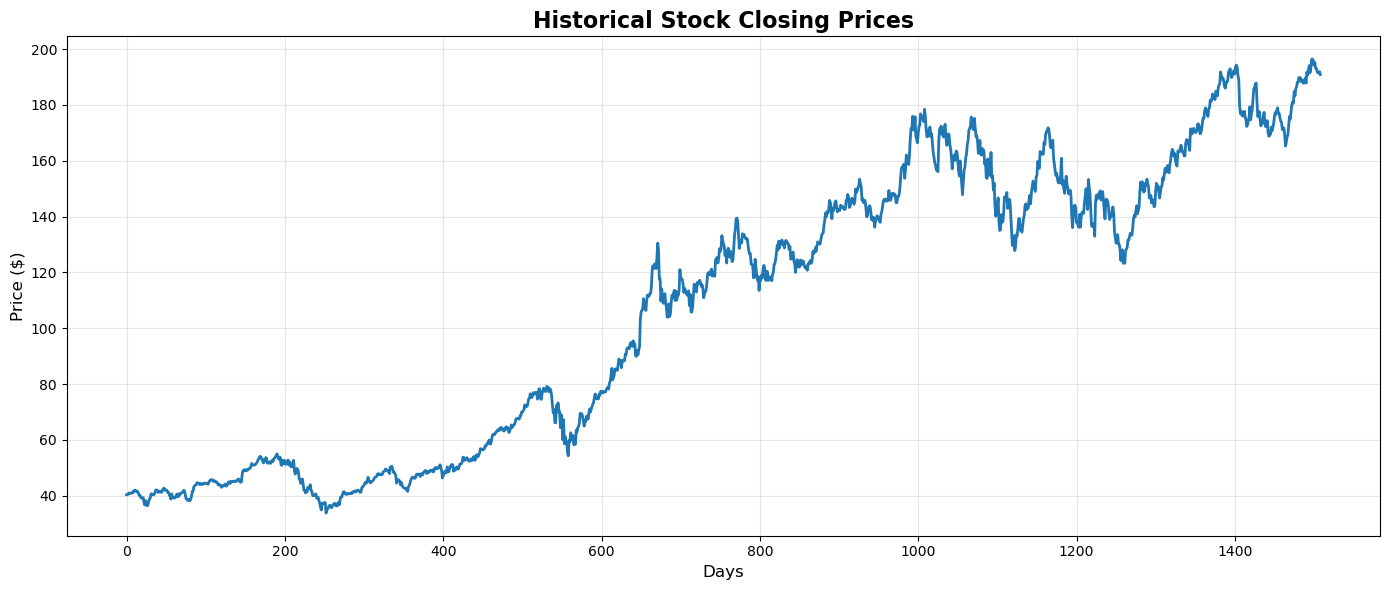

In [4]:
# Cell 3: Visualize Historical Data

# Remove the first two rows (headers/tickers) and reset index
df_clean = df.iloc[2:].reset_index(drop=True)

# Convert 'Close' column to numeric
df_clean['Close'] = pd.to_numeric(df_clean['Close'], errors='coerce')

plt.figure(figsize=(14, 6))
plt.plot(df_clean['Close'], linewidth=2)
plt.title('Historical Stock Closing Prices', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
# Cell 4: Create Lag Features
print("\n" + "="*70)
print("CREATING LAG FEATURES")
print("="*70)

def create_features(df, n_lags=5):
    """Create lag features for supervised learning"""
    df_feat = pd.DataFrame(index=df.index)
    df_feat["Close"] = df["Close"]
    
    # Create lag features
    for lag in range(1, n_lags+1):
        df_feat[f"lag_{lag}"] = df["Close"].shift(lag)
    
    # Drop rows with NaN
    df_feat = df_feat.dropna()
    return df_feat

# Create features with last 5 days
df_feat = create_features(df, n_lags=5)

print(f"\nOriginal data shape: {df.shape}")
print(f"After creating features: {df_feat.shape}")
print(f"\nFeature columns: {df_feat.columns.tolist()}")
print(f"\nSample of features:")
print(df_feat.head())


CREATING LAG FEATURES

Original data shape: (1511, 6)
After creating features: (1504, 6)

Feature columns: ['Close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

Sample of features:
                Close              lag_1              lag_2  \
7   40.86625289916992  40.87092590332031  41.02330017089844   
8   40.85685348510742  40.86625289916992  40.87092590332031   
9   41.08893966674805  40.85685348510742  40.86625289916992   
10  41.51324462890625  41.08893966674805  40.85685348510742   
11  41.30226516723633  41.51324462890625  41.08893966674805   

                lag_3              lag_4              lag_5  
7   40.56150436401367  40.37396240234375  40.38100051879883  
8   41.02330017089844  40.56150436401367  40.37396240234375  
9   40.87092590332031  41.02330017089844  40.56150436401367  
10  40.86625289916992  40.87092590332031  41.02330017089844  
11  40.85685348510742  40.86625289916992  40.87092590332031  


In [6]:
# Cell 5: Prepare Data for Training
print("\n" + "="*70)
print("PREPARING DATA")
print("="*70)

# Separate features and target
X = df_feat.drop("Close", axis=1).values
y = df_feat["Close"].values

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Scale features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nScaled X range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

# Split into train/test (80/20, no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

print(f"\nTraining set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")



PREPARING DATA

Features (X) shape: (1504, 5)
Target (y) shape: (1504,)

Scaled X range: [0.00, 1.00]

Training set size: 1203 (80.0%)
Test set size: 301 (20.0%)


In [7]:
# Cell 6: Train Linear Regression Model
print("\n" + "="*70)
print("TRAINING LINEAR REGRESSION MODEL")
print("="*70)

# Initialize and train model
model = LinearRegression()
print("\nTraining model...")
model.fit(X_train, y_train)
print("✓ Training complete!")

# Display model coefficients
print(f"\nModel Coefficients:")
for i, coef in enumerate(model.coef_, 1):
    print(f"  lag_{i}: {coef:.6f}")
print(f"  Intercept: {model.intercept_:.6f}")


TRAINING LINEAR REGRESSION MODEL

Training model...
✓ Training complete!

Model Coefficients:
  lag_1: 151.966191
  lag_2: 7.263545
  lag_3: -2.078562
  lag_4: 6.800701
  lag_5: -1.507893
  Intercept: 33.987675


In [8]:
# Cell 7: Make Predictions
print("\n" + "="*70)
print("MAKING PREDICTIONS")
print("="*70)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nPredictions made!")
print(f"Sample predictions vs actual (first 5):")
for i in range(min(5, len(y_test))):
    print(f"  Actual: ${float(y_test[i]):.2f}, Predicted: ${y_test_pred[i]:.2f}")



MAKING PREDICTIONS

Predictions made!
Sample predictions vs actual (first 5):
  Actual: $141.62, Predicted: $141.59
  Actual: $141.16, Predicted: $141.46
  Actual: $144.98, Predicted: $141.23
  Actual: $147.13, Predicted: $144.79
  Actual: $149.97, Predicted: $146.97


In [9]:
# Cell 8: Evaluate Model Performance
print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("\nTraining Set Performance:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print("\nTest Set Performance:")
print(f"  MSE:  {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")

# Interpret results
print("\nInterpretation:")
print(f"  - Model explains {test_r2*100:.2f}% of variance in test data")
print(f"  - Average prediction error: ${test_mae:.2f}")
print(f"  - Predictions are off by ~${test_rmse:.2f} on average (RMSE)")



MODEL EVALUATION

Training Set Performance:
  MSE:  4.3629
  RMSE: 2.0888
  MAE:  1.3924
  R²:   0.9979

Test Set Performance:
  MSE:  6.0280
  RMSE: 2.4552
  MAE:  1.8310
  R²:   0.9842

Interpretation:
  - Model explains 98.42% of variance in test data
  - Average prediction error: $1.83
  - Predictions are off by ~$2.46 on average (RMSE)


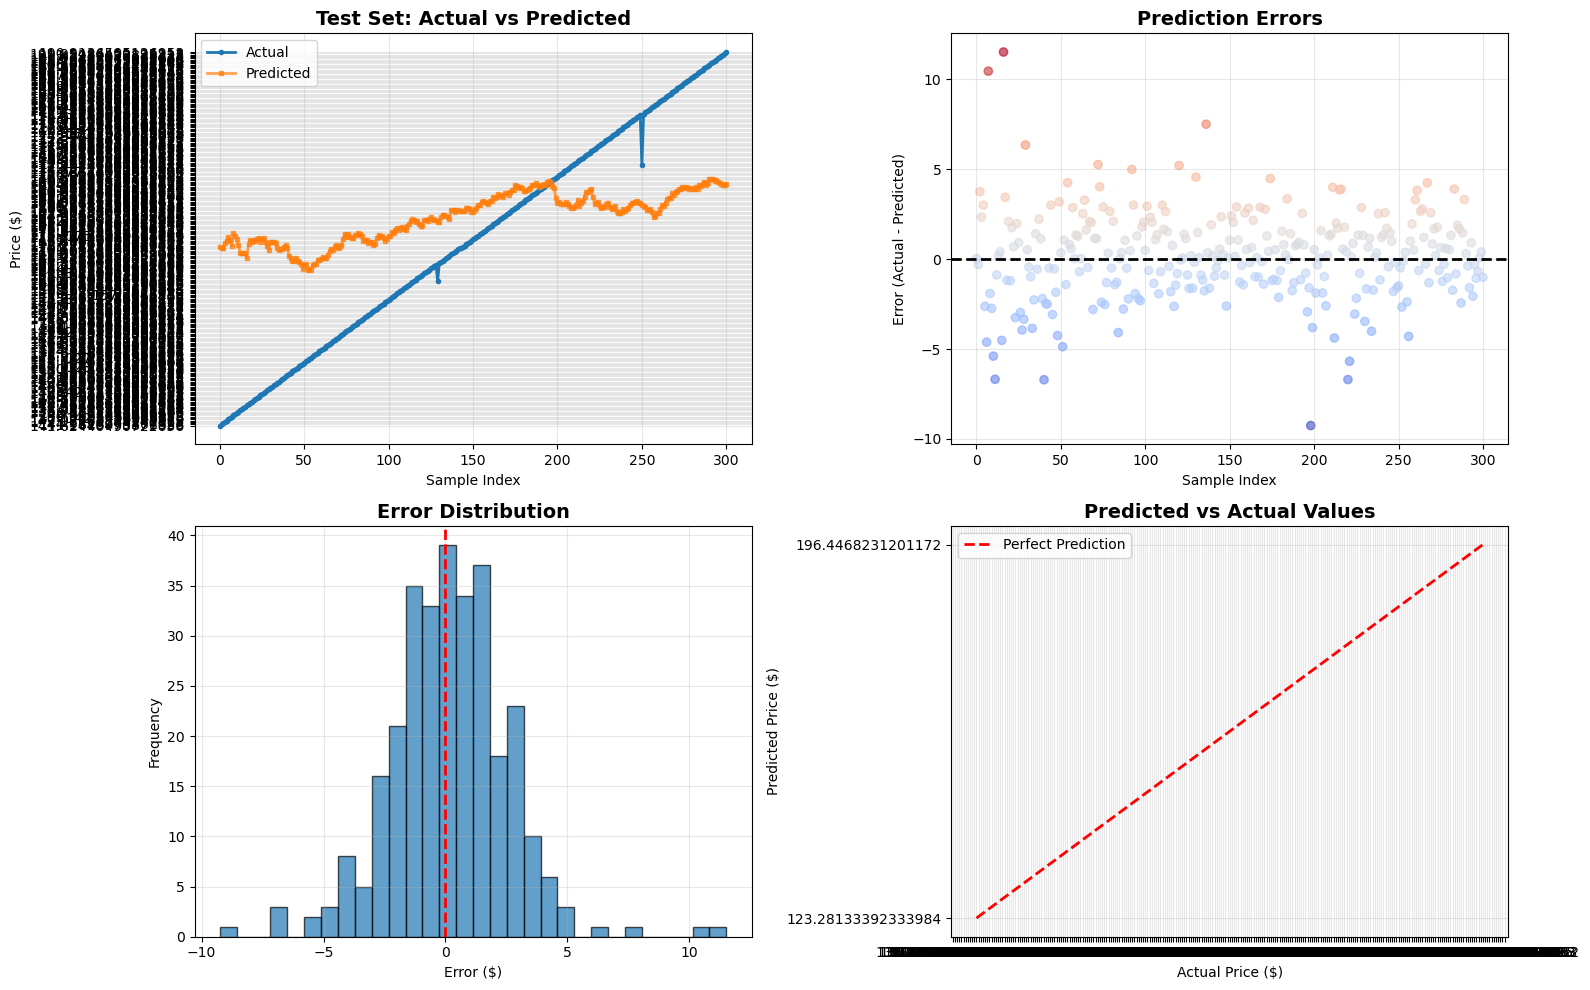

In [10]:
# Cell 9: Visualize Predictions vs Actual
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Test Set Predictions
axes[0, 0].plot(y_test, label='Actual', linewidth=2, marker='o', markersize=3)
axes[0, 0].plot(y_test_pred, label='Predicted', linewidth=2, marker='s', markersize=3, alpha=0.7)
axes[0, 0].set_title('Test Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Prediction Errors
y_test_numeric = y_test.astype(float)
errors = y_test_numeric - y_test_pred
axes[0, 1].scatter(range(len(errors)), errors, alpha=0.6, c=errors, cmap='coolwarm')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_title('Prediction Errors', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Error (Actual - Predicted)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Error Distribution
axes[1, 0].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_title('Error Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Error ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Predicted vs Actual Scatter
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_title('Predicted vs Actual Values', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Actual Price ($)')
axes[1, 1].set_ylabel('Predicted Price ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


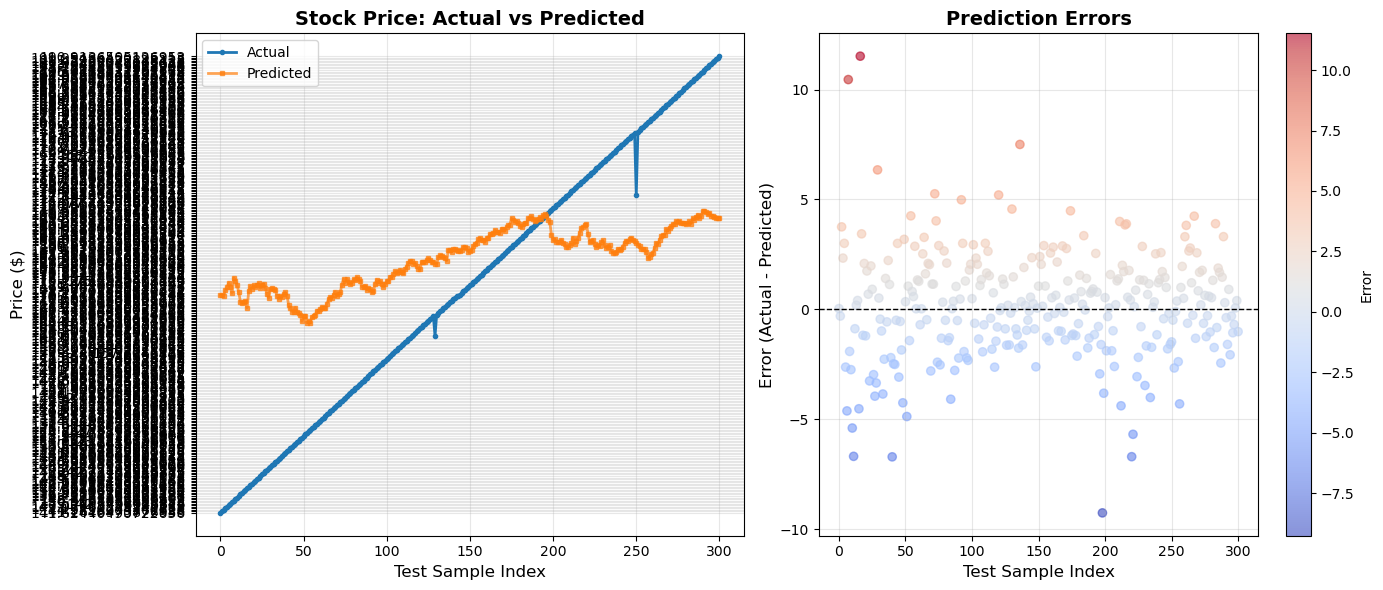

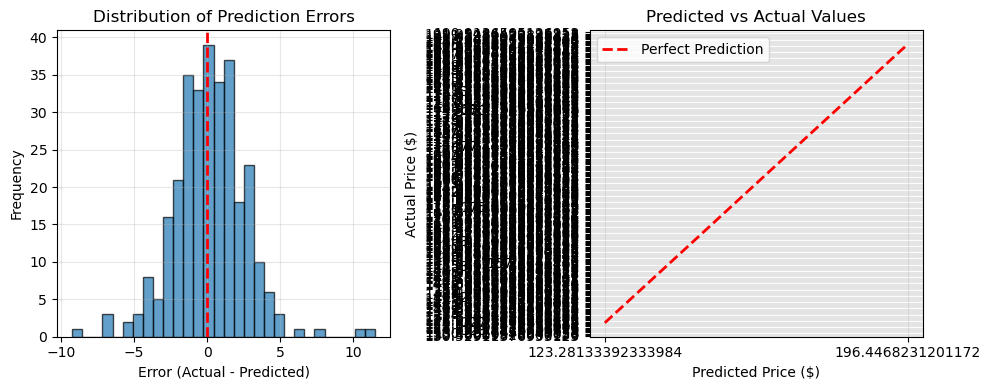


Error Statistics:
Mean Error: 0.1653
Std Error: 2.4496
Min Error: -9.2531
Max Error: 11.5187


In [14]:
# Cell 4: Visualize Results
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot 1: Actual vs Predicted
axes[0].plot(y_test, label="Actual", linewidth=2, marker='o', markersize=3)
axes[0].plot(y_test_pred, label="Predicted", linewidth=2, marker='s', markersize=3, alpha=0.7)
axes[0].set_title("Stock Price: Actual vs Predicted", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Test Sample Index", fontsize=12)
axes[0].set_ylabel("Price ($)", fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
# Plot 2: Prediction Error
y_test_numeric = y_test.astype(float)
errors = y_test_numeric - y_test_pred
scatter = axes[1].scatter(range(len(errors)), errors, alpha=0.6, c=errors, cmap='coolwarm')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title("Prediction Errors", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Test Sample Index", fontsize=12)
axes[1].set_ylabel("Error (Actual - Predicted)", fontsize=12)
plt.colorbar(scatter, ax=axes[1], label='Error')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: Save the plot
# plt.savefig("models/evaluation_plot.png", dpi=300, bbox_inches='tight')
# print("Plot saved to models/evaluation_plot.png")

# Cell 5: Additional Analysis (Optional)
# Error distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.title("Predicted vs Actual Values")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nError Statistics:")
print(f"Mean Error: {errors.mean():.4f}")
print(f"Std Error: {errors.std():.4f}")
print(f"Min Error: {errors.min():.4f}")
print(f"Max Error: {errors.max():.4f}")


In [17]:
# Cell 10: Error Analysis
print("\n" + "="*70)
print("ERROR ANALYSIS")
print("="*70)

print(f"\nError Statistics:")
print(f"  Mean Error:     {errors.mean():.4f}")
print(f"  Std Error:      {errors.std():.4f}")
print(f"  Min Error:      {errors.min():.4f}")
print(f"  Max Error:      {errors.max():.4f}")
print(f"  Median Error:   {np.median(errors):.4f}")

# Percentage of predictions within certain thresholds
within_1 = np.sum(np.abs(errors) <= 1) / len(errors) * 100
within_2 = np.sum(np.abs(errors) <= 2) / len(errors) * 100
within_5 = np.sum(np.abs(errors) <= 5) / len(errors) * 100

print(f"\nPrediction Accuracy:")
print(f"  Within $1:  {within_1:.1f}%")
print(f"  Within $2:  {within_2:.1f}%")
print(f"  Within $5:  {within_5:.1f}%")



ERROR ANALYSIS

Error Statistics:
  Mean Error:     0.1653
  Std Error:      2.4496
  Min Error:      -9.2531
  Max Error:      11.5187
  Median Error:   0.1924

Prediction Accuracy:
  Within $1:  35.2%
  Within $2:  64.8%
  Within $5:  96.0%


In [18]:
# Cell 11: Summary
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

print("\n✅ Linear Regression Model Complete!")
print("\nKey Findings:")
print(f"  • Used 5-day lag features for prediction")
print(f"  • Trained on {len(X_train)} samples")
print(f"  • Test RMSE: ${test_rmse:.4f}")
print(f"  • Test R² Score: {test_r2:.4f}")
print(f"  • Model explains {test_r2*100:.2f}% of price variance")

if test_r2 > 0.95:
    print("\n🎉 Excellent model performance!")
elif test_r2 > 0.90:
    print("\n👍 Good model performance!")
else:
    print("\n⚠️  Model could be improved")

print("="*70)


SUMMARY

✅ Linear Regression Model Complete!

Key Findings:
  • Used 5-day lag features for prediction
  • Trained on 1203 samples
  • Test RMSE: $2.4552
  • Test R² Score: 0.9842
  • Model explains 98.42% of price variance

🎉 Excellent model performance!
